In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
# !pip install --upgrade pythainlp
# !pip install pyLDAvis

In [3]:
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings


In [4]:
df = pd.read_csv("sentimentMacbookAirM1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  81 non-null     object
dtypes: object(1)
memory usage: 776.0+ bytes


In [5]:
df = df.astype(str)
df

,message
0,มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1? ลื่นไ...
1,สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว้ทำงาน...
2,ผมยังใช้ M1 อยู่ถ้าไม่ได้ตัดต่อระดับเทพๆๆๆ ยัง...
3,ถ้าไม่นับเล่นเกมนะครับ นี่คือโน๊ตบุ๊คที่ดีที่ส...
4,จุดเด่นอีกอย่างคือ เสียงลำโพงมันดีมาก
...,...
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...


# Tokenize word

In [6]:
stop_word = list(pythainlp.corpus.thai_stopwords())
rm_word = [ ' ','    ','\n', '(', ')', '?', '+', 'ผม', ':', 'ตัว', 'เรื่อง', 'ส่วนตัว', 'คับ', '--', '//', 'แน่นอน', 'สอย', 'ซื้อ', 'เวลา', '' ]
screenword = stop_word + rm_word

def tokenize_n_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize( str(sentence), engine = 'newmm' )
    for i in words :
        if i not in screenword :
            merged = merged + ',' + i
    return merged[1:]

In [7]:
df['tokenized'] = df['message'].apply(lambda x: tokenize_n_space(x))
df

,message,tokenized
0,มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1? ลื่นไ...,"คอนเฟิร์ม,เสียง,Macbook,air,m,1,ลื่นไหล,แบต,อึ..."
1,สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว้ทำงาน...,"สอบถาม,กะ,mac,air,m,1,ทำงาน,ตัดต่อ,กราฟิก,phot..."
2,ผมยังใช้ M1 อยู่ถ้าไม่ได้ตัดต่อระดับเทพๆๆๆ ยัง...,"M,1,ตัดต่อ,ระดับ,เทพ,ๆๆๆ,โปรแกรม,พัดลม"
3,ถ้าไม่นับเล่นเกมนะครับ นี่คือโน๊ตบุ๊คที่ดีที่ส...,"เล่น,เกม,โน๊ตบุ๊ค,ดี,โลก,ราคา,28000,ทำได้,ประส..."
4,จุดเด่นอีกอย่างคือ เสียงลำโพงมันดีมาก,"จุดเด่น,เสียง,ลำโพง,ดีมาก"
...,...,...
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...,"ขออนุญาต,สอบถาม,นะคะ,macbook,pro,14,”,m,1,pro,..."
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...,"สอบถาม,apple,care,เครื่อง,icare,ต่างกัน, ,กลัว..."
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...,"ผลิตภัณฑ์,แอปเปิ้ล,ลังเล,บ้าน,apple,ประกัน,ตอน..."
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...,"ออกมา,ทุกปี,ดู,การใช้งาน,ประโยชน์,ที่จะ,คน,รอ,..."


# Creating Dictionary

In [8]:
doc = df['tokenized'].to_list()
texts = [ [i for i in dc.split(',')] for dc in doc ]

dictionary = gensim.corpora.Dictionary(texts)

print(dictionary.token2id.keys())

dict_keys(['1', 'Macbook', 'Performance', 'Windows', 'air', 'drop', 'm', 'คอนเฟิร์ม', 'ลืม', 'ลื่นไหล', 'สักพัก', 'อึด', 'เสียง', 'แบต', 'illustrator', 'mac', 'photoshop', 'กราฟิก', 'กะ', 'ตัดต่อ', 'ทำงาน', 'น้อง', 'สอบถาม', 'ไหว', 'M', 'พัดลม', 'ระดับ', 'เทพ', 'โปรแกรม', 'ๆๆๆ', '28000', 'การใช้งาน', 'ดี', 'ต่อให้', 'ทำ', 'ทำได้', 'ประสบการณ์', 'ราคา', 'ห่า', 'เกม', 'เล่น', 'โน๊ตบุ๊ค', 'โลก', 'จุดเด่น', 'ดีมาก', 'ลำโพง', '7', 'CTW', 'geniusbar', 'studio', 'ขาย', 'คนอื่น', 'คอม', 'จี', 'ดีกว่า', 'ดู', 'ที้ง', 'นิดนึง', 'บริการ', 'พนักงาน', 'ระบาย', 'รุ', 'ร้าน', 'สอง', 'สัก', 'สาขา', 'ห่วย', 'เข้าไป', 'เจอ', 'เนาะ', 'เนียส', 'แย่', 'แอปเปิ้ล', 'ใช้งาน', '2013', '2020', '2023', '34', '900', 'Air', 'คน', 'ค่ำ', 'งานเอกสาร', 'ตอน', 'ต้นปี', 'ประชุม', 'ประทับใจ', 'ปี', 'มีปัญหา', 'ยัน', 'รุ่น', 'หาย', 'เก่า', 'เครื่อง', 'เดิม', 'เปิดตัว', 'เลือก', 'แชร์', 'แต่เช้า', 'ไว', '/', '4', 'adobe', 'apple', 'exel', 'premia', 'word', 'การตัดต่อ', 'ขั้นพื้นฐาน', 'ความแตกต่าง', 'ค่', 'ง', 'จ่าย', 'ดร'

In [9]:
gensim_corpus = [ dictionary.doc2bow(tx, allow_update = True) for tx in texts ]
word_frq = [ [ (dictionary[ides], frq) for ides, frq in coup ] for coup in gensim_corpus ]

# Topic Modeling

In [10]:
num_topic = 30
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_number = 1 # more number, more compute time spending

# Make index to word dictionary
temp = dictionary[0]
id2word = dictionary.id2token

%time
model = gensim.models.LdaModel( corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha='auto', eta='auto'
                               , iterations=iterations, num_topics=num_topic, passes=passes, eval_every=eval_number )

Wall time: 0 ns


In [11]:
pyLDAvis.gensim.prepare( model, gensim_corpus, dictionary )

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
27     0.143821  0.032872       1        1  8.156231
22     0.088793  0.154156       2        1  8.100693
12     0.008825 -0.166192       3        1  7.055529
5      0.126893 -0.189134       4        1  6.889425
20     0.155300  0.029811       5        1  6.687926
23     0.037370  0.116494       6        1  5.772370
24     0.061128 -0.017040       7        1  5.407211
10     0.118737 -0.044514       8        1  5.349902
16     0.007880  0.043038       9        1  4.151979
25     0.030479 -0.062219      10        1  4.124619
21     0.055146  0.054778      11        1  3.073956
4     -0.048194  0.070784      12        1  2.965659
11    -0.028489  0.046765      13        1  2.947885
26    -0.078017 -0.010722      14        1  2.871133
28    -0.145735 -0.006319      15        1  2.622994
29    -0.036726 -0.061833      16        1  2.492190
15    -0.044880  0.009419      17        1  2.386220
9     -0.119763 -0.018876      18        1  2.228422
6      0.016403  0.036209      19        1  2.176034
19    -0.098350  0.004547      20        1  2.096171
1      0.055054  0.016543      21        1  2.024479
2     -0.028744  0.041208      22        1  2.018075
8     -0.042845 -0.030668      23        1  1.937548
7      0.042987 -0.011176      24        1  1.859525
14     0.007827 -0.001049      25        1  1.571870
13    -0.033187 -0.032736      26        1  1.176605
3     -0.058995 -0.011043      27        1  1.096555
18    -0.077763  0.011384      28        1  0.621468
0     -0.057478 -0.002234      29        1  0.068681
17    -0.057478 -0.002252      30        1  0.068645, topic_info=          Term       Freq      Total Category  logprob  loglift
169             13.000000  13.000000  Default  30.0000  30.0000
4          air  20.000000  20.000000  Default  29.0000  29.0000
28     โปรแกรม  10.000000  10.000000  Default  28.0000  28.0000
37        ราคา  13.000000  13.000000  Default  27.0000  27.0000
163         กก   7.000000   7.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
4          air   0.001491  20.565467  Topic30  -6.7731  -2.2482
5         drop   0.001491   1.336557  Topic30  -6.7731   0.4854
6            m   0.001491  21.755359  Topic30  -6.7731  -2.3044
7    คอนเฟิร์ม   0.001491   2.111831  Topic30  -6.7731   0.0279
8          ลืม   0.001491   1.947505  Topic30  -6.7731   0.1089

[1373 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
169       4  0.724527       
169      16  0.072453       
169      23  0.144905       
818       5  0.904563       
224       9  0.749373      %
...     ...       ...    ...
306      25  0.304646  ไอแพด
266       7  0.724110  ไอโฟน
825       5  0.904563     ๆ?
833       8  0.723412      ”
844       5  0.710048    🥹😭 

[1303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 23, 13, 6, 21, 24, 25, 11, 17, 26, 22, 5, 12, 27, 29, 30, 16, 10, 7, 20, 2, 3, 9, 8, 15, 14, 4, 19, 1, 18])

- Predict topic

In [12]:
model.show_topic(1)

[('คุ้ม', 0.02984328),
 ('m', 0.02984328),
 ('1', 0.029843276),
 ('สำหรับ', 0.029843276),
 ('พก', 0.015166129),
 ('mini', 0.015166129),
 ('ทำงาน', 0.015166129),
 ('2', 0.015166129),
 ('mac', 0.015166129),
 ('hw', 0.015166129)]

In [13]:
df['topics'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [14]:
df

,message,tokenized,topics,score
0,มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1? ลื่นไ...,"คอนเฟิร์ม,เสียง,Macbook,air,m,1,ลื่นไหล,แบต,อึ...",25,0.958304
1,สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว้ทำงาน...,"สอบถาม,กะ,mac,air,m,1,ทำงาน,ตัดต่อ,กราฟิก,phot...",22,0.955834
2,ผมยังใช้ M1 อยู่ถ้าไม่ได้ตัดต่อระดับเทพๆๆๆ ยัง...,"M,1,ตัดต่อ,ระดับ,เทพ,ๆๆๆ,โปรแกรม,พัดลม",13,0.929325
3,ถ้าไม่นับเล่นเกมนะครับ นี่คือโน๊ตบุ๊คที่ดีที่ส...,"เล่น,เกม,โน๊ตบุ๊ค,ดี,โลก,ราคา,28000,ทำได้,ประส...",16,0.967341
4,จุดเด่นอีกอย่างคือ เสียงลำโพงมันดีมาก,"จุดเด่น,เสียง,ลำโพง,ดีมาก",11,0.869160
...,...,...,...,...
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...,"ขออนุญาต,สอบถาม,นะคะ,macbook,pro,14,”,m,1,pro,...",10,0.599389
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...,"สอบถาม,apple,care,เครื่อง,icare,ต่างกัน, ,กลัว...",20,0.980362
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...,"ผลิตภัณฑ์,แอปเปิ้ล,ลังเล,บ้าน,apple,ประกัน,ตอน...",22,0.960626
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...,"ออกมา,ทุกปี,ดู,การใช้งาน,ประโยชน์,ที่จะ,คน,รอ,...",11,0.980850


# Document Clustering
- Alternative method
- using Kmeans

In [15]:
# !pip install tensorflow_text
# !pip install umap-learn

In [16]:
# import pythainlp
# import gensim
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()

# import warnings

In [17]:
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import umap

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
import collections


In [18]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'

model = hub.load(module_url)

df_k = pd.read_csv("sentimentMacbookAirM1.csv")
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  81 non-null     object
dtypes: object(1)
memory usage: 776.0+ bytes


In [19]:
embed_cm = model(df_k['message'].values).numpy()
embed_cm

array([[-0.03456426,  0.05708109,  0.01469755, ...,  0.01186927,
        -0.01357166,  0.09678852],
       [-0.01054443,  0.03593316,  0.03521626, ..., -0.05023287,
        -0.02311422,  0.05664483],
       [ 0.04410389,  0.02387322,  0.01173277, ...,  0.00014756,
         0.08564217,  0.02562594],
       ...,
       [-0.0236195 ,  0.02566138, -0.0348949 , ..., -0.05413022,
         0.04013607,  0.03504496],
       [ 0.08128867,  0.01058034, -0.0175554 , ..., -0.07995252,
         0.08278595,  0.06422471],
       [-0.04074633,  0.07052976,  0.02234775, ...,  0.03710676,
         0.05302522, -0.03792713]], dtype=float32)

In [20]:
reducer = umap.UMAP(random_state=42, n_components=50)
umap_embed = reducer.fit_transform(embed_cm)

Text(0, 0.5, 'WCSS')

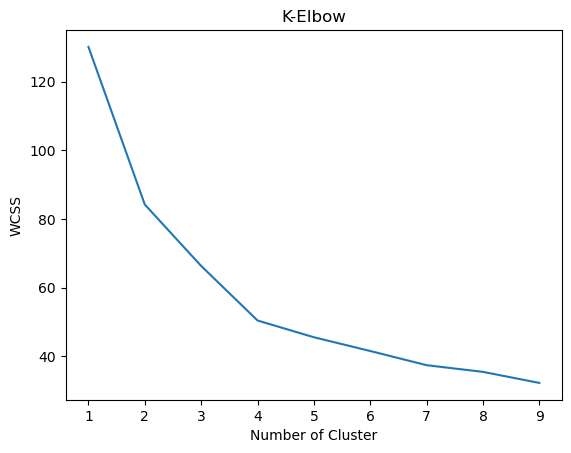

In [21]:
warnings.filterwarnings("ignore", category=UserWarning)

wcss = []
max_k = 10

for i in range(1,max_k):
    kmean = KMeans(n_clusters=i, n_init='auto')
    kmean.fit(umap_embed)
    
    wcss.append(kmean.inertia_)

n_cluster = range(1,max_k)
plt.plot(n_cluster, wcss)
plt.title('K-Elbow')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

In [22]:
k = 4
kmean = KMeans(n_clusters=4, n_init='auto')
kmean.fit(umap_embed)

df_k['ClusterID'] = kmean.labels_

df_k.tail(5)

,message,ClusterID
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...,1
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...,1
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...,1
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...,3
80,"Macbook Air M1 256GB ลดหมื่น เหลือ 25,999 คนเค...",1


In [23]:
df_kmeans = pd.DataFrame(columns=['ClusterID','text'])

for i in range(k) :
    row = []
    row.append(i)
    row.append( df_k['message'][df_k['ClusterID'] == i].to_string() )
    df_kmeans.loc[len(df_kmeans)] = row

df_kmeans.tail()

,ClusterID,text
0,0,11 ถ้าซื้อ ICloud+ 2 TB ไว้จำเป็นต้องเพิ่มแ...
1,1,1 สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว...
2,2,28 แพงแบบนี้ขายไม่...
3,3,0 มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1?...


In [24]:
stop_word_0 = list(pythainlp.corpus.thai_stopwords())
rm_word_0 = [ ' ','    ','\n', '(', ')', '?', '+', 'ผม', ':', 'ตัว', 'เรื่อง', 'ส่วนตัว', 'คับ', '--', '//', 'แน่นอน', 'สอย', 'ซื้อ', 'เวลา', '' ]
screenword_0 = stop_word_0 + rm_word_0

# nword = {"else"}.union(thai_words())

# custom_dt = Trie(nword)

In [25]:
def tokenize_tolist(sentence):
    merged = []
    words = pythainlp.word_tokenize(str(sentence), engine='newmm')
    for w in words:
        if w not in screenword_0:
            merged.append(w)
    return merged

In [26]:
# create regex to remove undesired characters

string_filt = "[!$#@&^*()+?']"
special_char_pattern = re.compile(string_filt)

# create regex to remove emoji

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"     # emoticons
                           u"\U0001F300-\U0001F5FF"     # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"     # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"     # flag(ios)
                           "]+", flags=re.UNICODE
                           )

# create regex to remove digit

num_pattern = re.compile("[0-9]")

# create regex to remove whitespace

space_pattern = re.compile("\\s+")

# create regex to remove dot

dot_pattern = re.compile("\\.+")

# create regex to remove slash

slash_pattern = re.compile("\\+")

# create regex to remove undesird

un_pattern = re.compile("x{2,}")

In [27]:
ll = [special_char_pattern, emoji_pattern, num_pattern, space_pattern, dot_pattern, slash_pattern, un_pattern]

for lam in ll :
    df_kmeans['text'] = df_kmeans['text'].apply(lambda x:lam.sub(r'',x))

df_kmeans['text_tokenized'] = df_kmeans['text'].apply(tokenize_tolist)
df_kmeans['text_count'] = df_kmeans['text_tokenized'].apply(lambda x: collections.Counter(x).most_common())

df_kmeans

,ClusterID,text,text_tokenized,text_count
0,0,ถ้าซื้อICloudTBไว้จำเป็นต้องเพิ่มแรมมั้ยเมื่อก...,"[ICloudTB, จำเป็นต้อง, แรม, ตอน, ชิป, intel, ส...","[(M, 4), (ชิป, 2), (ตัด, 2), (K, 2), (ICloudTB..."
1,1,สอบถามได้มั้ยคะว่ากะจะซื้อmacairmไว้ทำงานถ้าไม...,"[สอบถาม, กะ, macairm, ทำงาน, เล่น, เกม, โน๊ตบุ...","[(โปรแกรม, 4), (สอบถาม, 3), (ทำงาน, 3), (ปี, 3..."
2,2,แพงแบบนี้ขายไม่ออกแน่นอนตอนนั้นอยากได้เครื่องเ...,"[แพง, แบบนี้, ขายไม่ออก, ตอนนั้น, อยากได้, เคร...","[(pro, 3), (พัดลม, 2), (งบ, 2), (แพง, 1), (แบบ..."
3,3,มาคอนเฟิร์มอีกเสียงว่าMacbookairmลื่นไผมยังใช้...,"[คอนเฟิร์ม, เสียง, Macbookairm, ลื่น, ไผ, ม, M...","[(ตัดต่อ, 2), (ดี, 2), (ร้อน, 2), (สาย, 2), (ก..."


In [28]:
# show top key word of each cluster

top_n_word = 10
for i in range(0, len(df_kmeans)):
    print(f"Cluster ID : {i}\n")
    print(f"Most common words include : {list(df_kmeans['text_count'][i])[:top_n_word]}\n")

Cluster ID : 0

Most common words include : [('M', 4), ('ชิป', 2), ('ตัด', 2), ('K', 2), ('ICloudTB', 1), ('จำเป็นต้อง', 1), ('แรม', 1), ('ตอน', 1), ('intel', 1), ('สน', 1)]

Cluster ID : 1

Most common words include : [('โปรแกรม', 4), ('สอบถาม', 3), ('ทำงาน', 3), ('ปี', 3), ('ลังเล', 3), ('สำหรับ', 3), ('ลอง', 3), ('หมื่น', 3), ('แรง', 3), ('งาน', 3)]

Cluster ID : 2

Most common words include : [('pro', 3), ('พัดลม', 2), ('งบ', 2), ('แพง', 1), ('แบบนี้', 1), ('ขายไม่ออก', 1), ('ตอนนั้น', 1), ('อยากได้', 1), ('เครื่อง', 1), ('เบา', 1)]

Cluster ID : 3

Most common words include : [('ตัดต่อ', 2), ('ดี', 2), ('ร้อน', 2), ('สาย', 2), ('การใช้งาน', 2), ('คอนเฟิร์ม', 1), ('เสียง', 1), ('Macbookairm', 1), ('ลื่น', 1), ('ไผ', 1)]



# Document clustering
- Alternative method
- Using Agglomorative Clustering with cosine similarity

In [29]:
knn_graph = kneighbors_graph(embed_cm, 5, include_self=False)
modl = AgglomerativeClustering(linkage="average", connectivity=knn_graph, n_clusters=10, affinity="cosine")

modl.fit(embed_cm)
df_k['AgglomerativeID'] = modl.labels_

df_k.tail()

C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,message,ClusterID,AgglomerativeID
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...,1,1
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...,1,1
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...,1,1
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...,3,1
80,"Macbook Air M1 256GB ลดหมื่น เหลือ 25,999 คนเค...",1,1


In [30]:
df_agg = pd.DataFrame(columns=['AgglomerativeID','message'])

for i in range(0,k):
    row = []
    row.append(i)
    row.append(str(df_k['message'][df_k['AgglomerativeID'] == i].tolist()))
    df_agg.loc[len(df_agg)] = row

df_agg

,AgglomerativeID,message
0,0,['ไม่รุจะระบายที่ไหนขอนิดนึง ผมว่าบริการหลังกา...
1,1,['มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1? ลื่...
2,2,['แพงแบบนี้ขายไม่ออกแน่นอน']
3,3,['ไม่เห็นร้อนเลยครับ ใช้งานทั่วไปไม่ร้อน เขียน...


In [31]:
for lam in ll :
    df_agg['message'] = df_agg['message'].apply(lambda x:lam.sub(r'',x))

df_agg['text_tokenized'] = df_agg['message'].apply(tokenize_tolist)
df_agg['text_count'] = df_agg['text_tokenized'].apply(lambda x: collections.Counter(x).most_common())

df_agg

,AgglomerativeID,message,text_tokenized,text_count
0,0,[ไม่รุจะระบายที่ไหนขอนิดนึงผมว่าบริการหลังการข...,"[[, รุ, ระบาย, นิดนึง, บริการ, ขาย, แอปเปิ้ล, ...","[(บริการ, 2), (ดู, 2), (พนักงาน, 2), (สอง, 2),..."
1,1,[มาคอนเฟิร์มอีกเสียงว่าMacbookairmลื่นไหลมากๆแ...,"[[, คอนเฟิร์ม, เสียง, Macbookairm, ลื่นไหล, แบ...","[(,, 69), (ทำงาน, 21), (ราคา, 19), (ดี, 15), (..."
2,2,[แพงแบบนี้ขายไม่ออกแน่นอน],"[[, แพง, แบบนี้, ขายไม่ออก, ]]","[([, 1), (แพง, 1), (แบบนี้, 1), (ขายไม่ออก, 1)..."
3,3,[ไม่เห็นร้อนเลยครับใช้งานทั่วไปไม่ร้อนเขียนโปร...,"[[, ร้อน, ใช้งาน, ทั่วไป, ร้อน, โปรแกรม, แทบจะ...","[(ร้อน, 4), (โปรแกรม, 2), ([, 1), (ใช้งาน, 1),..."


In [32]:
# show top key word of each cluster

top_n_word = 10
for i in range(0, len(df_agg)):
    print(f"Cluster ID : {i}\n")
    print(f"Most common words include : {list(df_agg['text_count'][i])[:top_n_word]}\n")

Cluster ID : 0

Most common words include : [('บริการ', 2), ('ดู', 2), ('พนักงาน', 2), ('สอง', 2), ('เจอ', 2), ('ประสบการณ์', 2), ('ร้าน', 2), ('นิ้ว', 2), ('[', 1), ('รุ', 1)]

Cluster ID : 1

Most common words include : [(',', 69), ('ทำงาน', 21), ('ราคา', 19), ('ดี', 15), ('ใช้งาน', 13), ('ตัดต่อ', 12), ('M', 12), ('โปรแกรม', 11), ('พัดลม', 11), ('เครื่อง', 11)]

Cluster ID : 2

Most common words include : [('[', 1), ('แพง', 1), ('แบบนี้', 1), ('ขายไม่ออก', 1), (']', 1)]

Cluster ID : 3

Most common words include : [('ร้อน', 4), ('โปรแกรม', 2), ('[', 1), ('ใช้งาน', 1), ('ทั่วไป', 1), ('แทบจะ', 1), ('อุ่น', 1), ('ด้วยซ้ำ', 1), ('tabchrome', 1), ('tab', 1)]

